In [ ]:
!pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/d0/28/88b81881c056376254618fad622a5e94b5126db8c61157ea1910cd1c040a/pandas-2.0.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 1.2 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for numpy>=1.21.0 from https://files.pythonhosted.org/packages/f0/5a/9b7b7bae29f9f5f8a976607cd30139c1fec9076c0e65ea918d3400924acf/numpy-1.25.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 7.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━ 9.1/17.6 MB 5.8 MB/s eta 0:00:02

In [181]:
!pip install matplotlib

In [8]:
!pip install psycopg2-binary

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 6.0 MB/s eta 0:00:0000:0100:01


In [271]:
import pandas as pd
from sqlalchemy import create_engine
from queries import and_query_cleaned, apl_cleaned_query
from collections import Counter
from datetime import datetime
import matplotlib.pyplot as plt
from operator import itemgetter

In [17]:
engine = create_engine('postgresql://postgres:postgres@db:5432/postgres')

In [18]:
apl_df = pd.read_sql(apl_cleaned_query,engine)

In [19]:
and_df = pd.read_sql(and_query_cleaned,engine)

### goals
<ul>
<li><strike>Plot the distribution of app sizes across our three categories. This column is called Size_Bytes in the App Store data and Size in the Google Play data.</strike>
</li>
<li><strike>Compute the average rating across all ratings for each of the three categories. Note that we’re not looking for an average of the average ratings for each category, but rather the average across all ratings for each category. For example, if we have two apps in the same category and one app has 1 rating with an average of 1.0 and the other app has 2 ratings with an average of 5.0, the value we’re looking for is 3.7 (average of 1, 5, and 5), not 3.0 (average of 1 and 5). The relevant columns here are Average_User_Rating and Reviews for the App Store and Rating and Rating Count for Google Play.</strike>
</li>
<li><strike>Plot the number of new releases in each category over time by month, using the Released column.</strike></li>
<li><strike>List the 10 biggest apps by size in each category by year.</strike></li>
</ul>

In [159]:
datetimes = []
for i in list(apl_df['release_date']):
    try:
        datetimes.append(datetime.strptime(i[:10], '%Y-%m-%d'))
    except:
        datetimes.append(i)

In [162]:
apl_df['release_date'] = datetimes

In [172]:
datetimes = []
for i in list(and_df['release_date']):
    datetimes.append(datetime.strptime(i, '%b %d, %Y'))


In [174]:
and_df['release_date'] = datetimes

In [175]:
len(datetimes)

598289

In [ ]:
date_string = '2021-12-31'
datetime = datetime.strptime(date_string, '%Y-%m-%d')

In [176]:
and_df

,name,release_date,release_year,filesize,genre,rating,rating_amt,platform
0,Dieta Cetogénica,2017-05-18,2017,2800000.0000,Health & Fitness,4.6000,11844.0000,android
1,Murottal Al-Qur'an Anak Full,2015-07-05,2015,23000000.0000,Games,4.3000,321.0000,android
2,Real 3D Sounds,2016-07-17,2016,26000000.0000,Music,3.4000,160.0000,android
3,Beating Together - Visual Novel,2018-11-22,2018,56000000.0000,Games,3.9000,3141.0000,android
4,THR Remote,2019-09-18,2019,12000000.0000,Music,2.7000,278.0000,android
...,...,...,...,...,...,...,...,...
598284,All Germany Radios in One App,2019-08-24,2019,8000000.0000,Music,0.0000,0.0000,android
598285,Click Counter. How Many Clicks Can You Handle?,2019-07-31,2019,9200000.0000,Games,0.0000,0.0000,android
598286,Spooky Halloween,2016-10-29,2016,NaN,Games,3.9000,11.0000,android
598287,Ringtones Def Leppard Greatest Hits,2019-09-29,2019,11000000.0000,Music,4.6000,50.0000,android


In [34]:
ends = []
for i in list(and_df['filesize']):
    if i[-1] not in ends:
        ends.append(i[-1])
        ends.append(i)

In [35]:
ends

['M', '2.8M', 'e', 'Varies with device', 'k', '659k', 'G', '1.5G']

In [36]:
kb = 1000
mb = 1000 * kb
gb = 1000 * mb

In [53]:
calc = []
for i in list(and_df['filesize']):
    if i[-1] == 'M':
        calc.append(float(i[:-1].replace(',','')) * mb)
    elif i[-1] == 'k':
        calc.append(float(i[:-1].replace(',','')) * kb)
    elif i[-1] == 'G':
        calc.append(float(i[:-1].replace(',','')) * gb)
    else:
        calc.append(None)

In [58]:
and_df['filesize'] = calc

In [177]:
df = pd.concat([apl_df,and_df])

In [115]:
grouped = df.groupby(['genre', 'release_year'])

In [116]:
df = df.sort_values(by='filesize', ascending=False)

In [117]:
grouped = df.groupby(['genre', 'release_year']).head(10)

In [118]:
grouped = grouped.sort_values(['genre', 'release_year'])

In [119]:
inmb = []
for i in list(grouped['filesize']):
    inmb.append(i / mb) 

In [89]:
pd.set_option('display.max_rows', 500)

In [120]:
grouped['mb'] = inmb

In [106]:
apl_df['filesize'].dtype

dtype('float64')

In [ ]:
# was a little bit suspicious because all the top results were ios apps
# confirmed my conversion math was right, and compared some of the largest total android apps
# all the hand picked large android apps were way smaller so I think this list is correct

In [129]:
len(grouped)

431

In [138]:
grouped.loc[grouped['genre'] == '2022']

,name,release_date,release_year,filesize,genre,rating,rating_amt,platform,mb
180619,LOST in Blue (Global),2022-01-14T08:00:00Z,2022,2510417920.0000,Games,0.0000,0.0000,apple,2510.4179
93911,Galaxy Mobile,2022-01-20T08:00:00Z,2022,1134328832.0000,Games,0.0000,0.0000,apple,1134.3288
177723,Timewreck Tales,2022-02-02T08:00:00Z,2022,433393664.0000,Games,0.0000,0.0000,apple,433.3937
30571,Pet Care Game–My Cat & Dog Sim,2022-03-25T07:00:00Z,2022,360672256.0000,Games,0.0000,0.0000,apple,360.6723
119892,Magicabin,2022-01-18T08:00:00Z,2022,353041408.0000,Games,0.0000,0.0000,apple,353.0414
197444,Summer Athletics Sports 3D Sim,2022-01-21T08:00:00Z,2022,343053312.0000,Games,0.0000,0.0000,apple,343.0533
98598,Twins Baby Care & Newborn Game,2022-02-11T08:00:00Z,2022,330947584.0000,Games,0.0000,0.0000,apple,330.9476
39635,High School Anime Teacher Game,2022-02-11T08:00:00Z,2022,319857664.0000,Games,0.0000,0.0000,apple,319.8577
64981,Billionaire Rich Dad Family 3D,2022-02-06T08:00:00Z,2022,316479488.0000,Games,0.0000,0.0000,apple,316.4795
50380,Anime Pregnant Mother Care Sim,2022-03-04T08:00:00Z,2022,290083840.0000,Games,0.0000,0.0000,apple,290.0838


In [227]:
sub_health = df.loc[df['genre'] == 'Health & Fitness']
sub_games = df.loc[df['genre'] == 'Games']
sub_music = df.loc[df['genre'] == 'Music']

In [228]:
### getting dates spread
years_health = []
months_health = []
for i in list(sub_health['release_date']):
    years_health.append(i.year)
    months_health.append(i.month)

years_games = []
months_games = []
for i in list(sub_games['release_date']):
    years_games.append(i.year)
    months_games.append(i.month)

years_music = []
months_music = []
for i in list(sub_music['release_date']):
    years_music.append(i.year)
    months_music.append(i.month)

In [229]:
data_health = list(zip(years_health, months_health))
data_games = list(zip(years_games, months_games))
data_music = list(zip(years_music, months_music))

In [231]:
counted_health = dict(Counter(data_health))
counted_games = dict(Counter(data_games))
counted_music = dict(Counter(data_music))

In [232]:
unq_health = list(set(data_health))
unq_games = list(set(data_games))
unq_music = list(set(data_music))

In [240]:
combined = unq_health + unq_games + unq_music

In [243]:
unq_combined = list(set(combined))

In [278]:
nullremoved = []
for i in unq_combined:
    if type(i[0]) != float:
        nullremoved.append(i)

In [280]:
sorteddate = sorted(
    nullremoved, 
    key=lambda x: x[1]
)

sorteddate = sorted(
    sorteddate, 
    key=lambda x: x[0]
)

In [282]:
#sorteddate

In [285]:
x = []
y = []
y2 = []
y3 = []
for i in sorteddate:
    x.append(str(i[1]) + "/" + str(i[0]))
    try:
        y.append(counted_games[i])
    except:
        y.append(0)
    try:
        y2.append(counted_health[i])
    except:
        y2.append(0)
    try:
        y3.append(counted_music[i])
    except:
        y3.append(0)

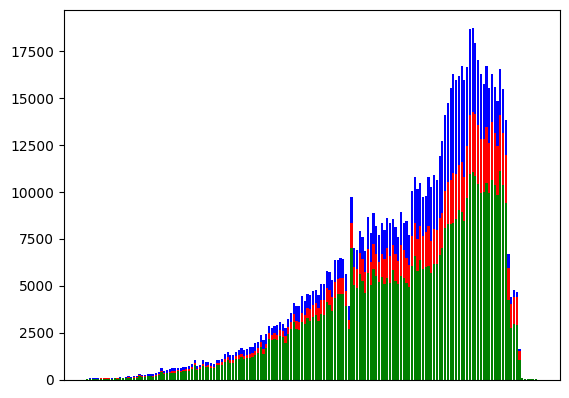

In [308]:
"""
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.xticks([])
plt.show()
"""

fig, ax = plt.subplots()

# Stacked bar chart
ax.bar(x, y, color = "green") #games
ax.bar(x, y2, bottom = y, color = "red") #health
ax.bar(x, y3, bottom = np.add(y, y2), color = "blue") #music

plt.xticks([])
plt.title('app releases per month')
plt.show()


In [293]:
import numpy as np

In [302]:
y[100]

5259

In [303]:
y2[100]

1159

In [301]:
y3[100]

1166

In [309]:
#Compute the average rating across all ratings for each of the three categories. Note that we’re not looking for an average 
#of the average ratings for each category, but rather the average across all ratings for each category. For example, if we 
#have two apps in the same category and one app has 1 rating with an average of 1.0 and the other app has 2 ratings with an 
#average of 5.0, the value we’re looking for is 3.7 (average of 1, 5, and 5), not 3.0 (average of 1 and 5). The relevant 
#columns here are Average_User_Rating and Reviews for the App Store and Rating and Rating Count for Google Play.

In [315]:
df

,name,release_date,release_year,filesize,genre,rating,rating_amt,platform,year,month
0,Polgar: Magic Detective,2021-06-10,2021,1294534656.0000,Games,1.2500,4.0000,apple,2021.0000,6.0000
1,Zedic,2020-01-15,2020,10567680.0000,Health & Fitness,5.0000,1.0000,apple,2020.0000,1.0000
2,TNM,2015-09-16,2015,19420160.0000,Health & Fitness,0.0000,0.0000,apple,2015.0000,9.0000
3,To Be Or Not To Be -Ryan North,2015-03-18,2015,696291328.0000,Games,4.0667,60.0000,apple,2015.0000,3.0000
4,Eat-Right,2019-05-01,2019,14516224.0000,Health & Fitness,0.0000,0.0000,apple,2019.0000,5.0000
...,...,...,...,...,...,...,...,...,...,...
598284,All Germany Radios in One App,2019-08-24,2019,8000000.0000,Music,0.0000,0.0000,android,2019.0000,8.0000
598285,Click Counter. How Many Clicks Can You Handle?,2019-07-31,2019,9200000.0000,Games,0.0000,0.0000,android,2019.0000,7.0000
598286,Spooky Halloween,2016-10-29,2016,NaN,Games,3.9000,11.0000,android,2016.0000,10.0000
598287,Ringtones Def Leppard Greatest Hits,2019-09-29,2019,11000000.0000,Music,4.6000,50.0000,android,2019.0000,9.0000


In [316]:
sub_health = df.loc[df['genre'] == 'Health & Fitness']
sub_games = df.loc[df['genre'] == 'Games']
sub_music = df.loc[df['genre'] == 'Music']

In [321]:
rate_health = list(sub_health['rating'])
amt_health = list(sub_health['rating_amt'])

In [322]:
rate_games = list(sub_games['rating'])
amt_games = list(sub_games['rating_amt'])

In [323]:
rate_music = list(sub_music['rating'])
amt_music = list(sub_music['rating_amt'])

In [326]:
rates_health = list(zip(rate_health, amt_health))
rates_games = list(zip(rate_games, amt_games))
rates_music = list(zip(rate_music, amt_music))

In [331]:
ratings = 0
combined = 0
for i in rates_health:
    if i[1] > .5:
        combined = combined + (i[0] * i[1])
        ratings = ratings + i[1]

In [335]:
health_avg = combined / ratings

In [336]:
ratings = 0
combined = 0
for i in rates_games:
    if i[1] > .5:
        combined = combined + (i[0] * i[1])
        ratings = ratings + i[1]
games_avg = combined / ratings

In [337]:
ratings = 0
combined = 0
for i in rates_music:
    if i[1] > .5:
        combined = combined + (i[0] * i[1])
        ratings = ratings + i[1]
music_avg = combined / ratings

In [338]:
print(health_avg)
print(games_avg)
print(music_avg)

4.5555467914962655
4.311394363825693
4.479038125325136


In [339]:
#Plot the distribution of app sizes across our three categories. This column is called Size_Bytes in the App Store data and Size in the Google Play data.

In [344]:
avgfs_health = sub_health['filesize'].mean()
avgfs_games = sub_games['filesize'].mean()
avgfs_music = sub_music['filesize'].mean()

In [347]:
mb_music = avgfs_music / mb
mb_health = avgfs_health / mb
mb_games = avgfs_games / mb

72.72859969433385

Text(0.5, 1.0, 'average app size in mb')

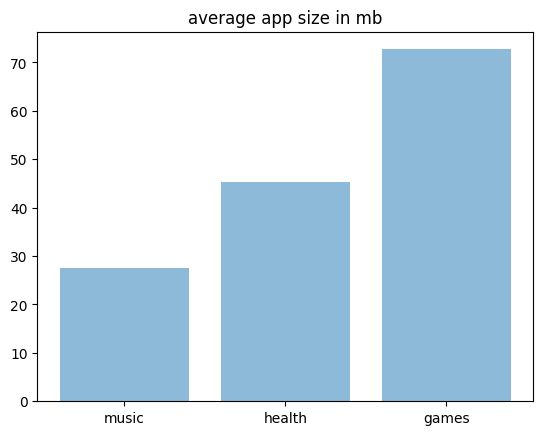

In [350]:
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
x = ['music','health','games']
y = [mb_music,mb_health,mb_games]

plt.bar(x, y, align='center', alpha=0.5)

plt.title('average app size in mb')